# Wealth Transfer Model

In this tutorial, we will create a simple agent-based model that explores the distribution of wealth under a trading population of agents. The [original version of this model](https://mesa.readthedocs.io/en/master/tutorials/intro_tutorial.html) has been designed by the Project Mesa Team for the [MESA](https://mesa.readthedocs.io/) package. This is an adaption of the same model for the [agentpy](https://mesa.readthedocs.io) package to allow for a comparison between the two frameworks.

To start, we import agentpy as follows (recommended):

In [1]:
import agentpy as ap

Each agent is set up as an object of `agent`. These objects hold the variables and possible actions of each agent. 

For our demonstration, we define a new agent type `wealth_agent`. Each agent starts with one unit of  `wealth`. When `wealth_transfer` is called, the agent selects another agent at random and gives them one unit of their own wealth if they have one to spare.

In [2]:
class wealth_agent(ap.agent):
    
    """ An agent with wealth """
    
    def setup(self):

        self.wealth = 1

    def wealth_transfer(self):
        
        if self.wealth > 0:
            
            partner = self.model.agents.random()
            partner.wealth += 1
            self.wealth -= 1   

For later analysis, we define a method `gini` that can measure the inequality of a passed list.

In [3]:
import numpy as np

def gini(x):
    
    """ Calculate Gini Coefficient """
    # By Warren Weckesser https://stackoverflow.com/a/39513799
    
    mad = np.abs(np.subtract.outer(x, x)).mean() # Mean absolute difference
    rmad = mad/np.mean(x) # Relative mean absolute difference
    return 0.5 * rmad 

All agents are contained within an object of the class `model`. The model initializes with the above defined agents, the number of which will be taken from the models' parameters. In each time-step, `wealth_transfer` is activated for all agents in a random order, after which a model variable `Gini Coefficient` are recorded. At the end of the simulation, each agents `wealth` is also recorded.

In [4]:
class wealth_model(ap.model):
    
    """ A simple model of random wealth transfers """
    
    def setup(self):
        
        self.add_agents(self.p.agents, wealth_agent)
    
    def step(self):
        
        self.agents.do('wealth_transfer', order='random')
        
    def update(self):
        
        self.record('Gini Coefficient', gini(self.agents.wealth))
        
    def end(self):
        
        self.agents.record('wealth')

To run a simulation, we define a dictionary of parameters that defines the number of agents and the number of steps that the model will run.

In [5]:
parameters = {
    'agents': 100,
    'steps': 100
}

To perform a simulation, we initialize our model with these parameters and call the method `model.run`, which returns a `data_dict` of recorded data.

In [6]:
model = wealth_model(parameters)
results = model.run()

Completed: 100 steps
Run time: 0:00:00.204882
Simulation finished


To visualize the distribution of wealth, we can use `pandas.DataFrame.hist`.

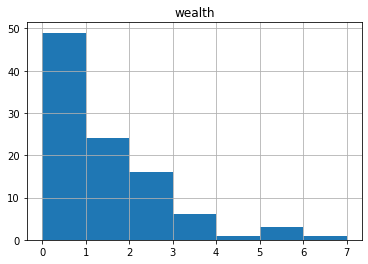

In [7]:
df = results.wealth_agent_vars
ax = df.hist(bins=range(df.wealth.max()+1))

To visualize the evolution of our Gini Coefficient, we can use  `pandas.DataFrame.plot`

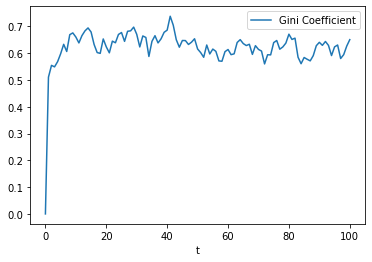

In [8]:
ax = results.model_vars.xs('model').plot()